# REGRESIÓN

# Presentación del conjunto de datos

Se trata de un conjunto de datos con observaciones que representan estadísticas de salud de pacientes según diversas características.

El dataset contiene **3000 observaciones**, cada una correspondiente a un paciente, con las siguientes variables:

- **name**: nombre del paciente (anonimizado)  
- **years**: edad del paciente  
- **gender**: género del paciente (hombre o mujer)  
- **disease**: enfermedad diagnosticada (Diabetes, Hipertensión, Asma, Cardíaca, Obesidad)  
- **treatment_duration**: duración del tratamiento en meses  


Y una variable objetivo:  
- **treatment_cost**: coste total del tratamiento en euros

# Fase 1: Recopilación de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/CSV/treatments.csv'

df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fase 2: Exploración y preparación de los datos

In [ ]:
# Comprobación de que los datos se han cargado correctamente
df

,pacient,years,gender,disease,treatment_duration,treatment_cost
0,Pacient A,63.0,Man,Asthma,19,6457.851478
1,Pacient A,28.0,Woman,Asthma,39,12178.504567
2,Pacient C,40.0,Man,Obesitat,53,16946.868335
3,Pacient B,27.0,Woman,Asthma,57,17284.440899
4,Pacient B,35.0,Woman,Diabetes,42,12263.818925
...,...,...,...,...,...,...
3015,Pacient E,46.0,Man,Diabetes,8,1137.687078
3016,Pacient C,71.0,Woman,Cardiac,38,10464.486259
3017,Pacient D,40.0,Woman,Obesitat,16,4474.398279
3018,Pacient D,33.0,Man,Diabetes,44,12760.743693


In [ ]:
# Informació del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pacient             3020 non-null   object 
 1   years               3015 non-null   float64
 2   gender              3015 non-null   object 
 3   disease             3015 non-null   object 
 4   treatment_duration  3020 non-null   int64  
 5   treatment_cost      3020 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 141.7+ KB


## Selección de características

In [ ]:
# Borramos características
df = df.drop('pacient',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years               3015 non-null   float64
 1   gender              3015 non-null   object 
 2   disease             3015 non-null   object 
 3   treatment_duration  3020 non-null   int64  
 4   treatment_cost      3020 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 118.1+ KB


## Nulos

In [ ]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

years                 5
gender                5
disease               5
treatment_duration    0
treatment_cost        0
dtype: int64


In [ ]:
# Eliminar valores nulos y volver a comprobar
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

years                 0
gender                0
disease               0
treatment_duration    0
treatment_cost        0
dtype: int64


## Únicos

In [ ]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Man' 'Woman']
disease: ['Asthma' 'Obesitat' 'Diabetes' 'Cardiac' 'Hypertension']


## Duplicados

In [ ]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 10


In [ ]:
# Eliminar duplicados manteniendo uno
df = df.drop_duplicates()

# Comprobar el número de duplicados después de la eliminación
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")

Duplicados después de eliminar: 0


## Distribuciones

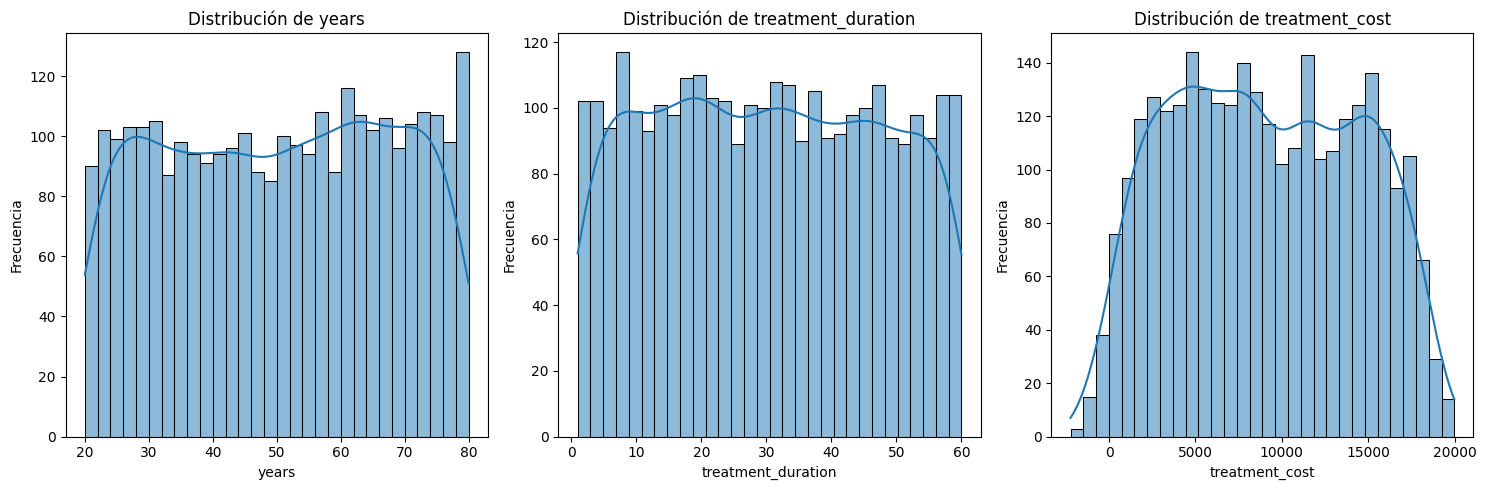

In [ ]:
"""
a variable objetivo treatment_cost presenta una distribución bastante simétrica,
sin una asimetría significativa hacia la derecha. No parece necesaria una transformación logarítmica,
al menos en esta fase. Aunque se aprecian algunos valores extremos en los márgenes, la distribución general no muestra sesgos evidentes.

Modelos como Random Forest siguen siendo adecuados para este tipo de variable, ya que no requieren normalización
y manejan bien la presencia de outliers o ligeras irregularidades.

De momento, se mantiene la variable sin transformar y se observan los resultados con los modelos base.
"""

# Seleccionar solo las columnas numéricas de tipo int o float
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definir el número de columnas y filas para los subplots con 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Generar histogramas para cada variable numérica
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Histograma con línea KDE
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes vacíos si el número de variables es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlaciones con la variable objectivo

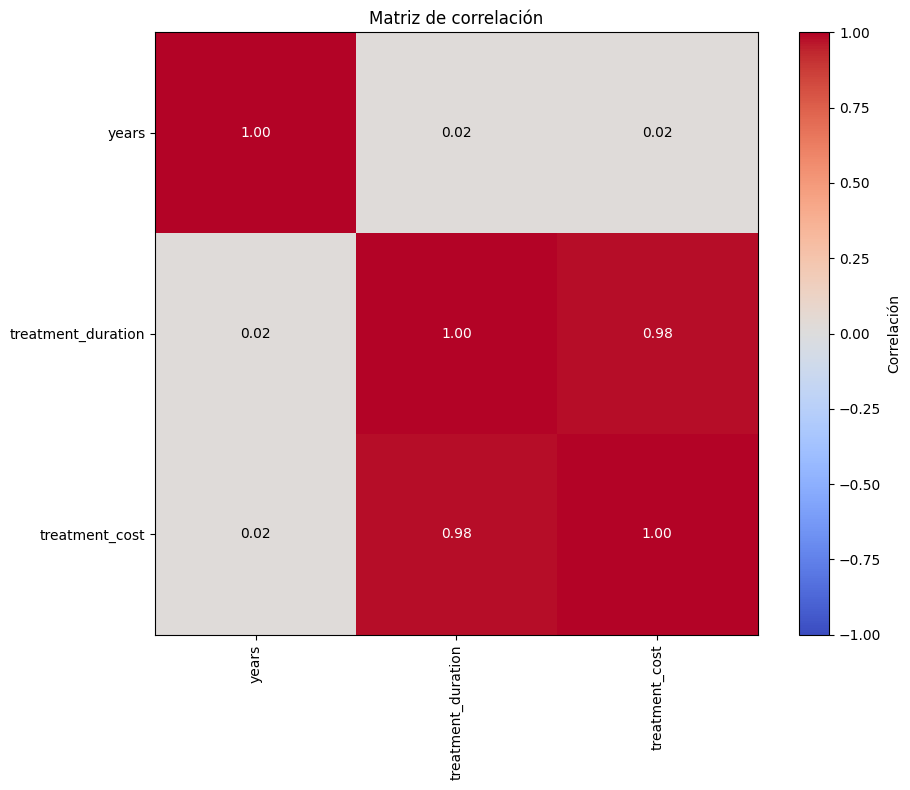

In [ ]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=["float64", "int64"])

# Calcular matriz de correlación
correlation_matrix = df_numericas.corr()

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = df_numericas.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

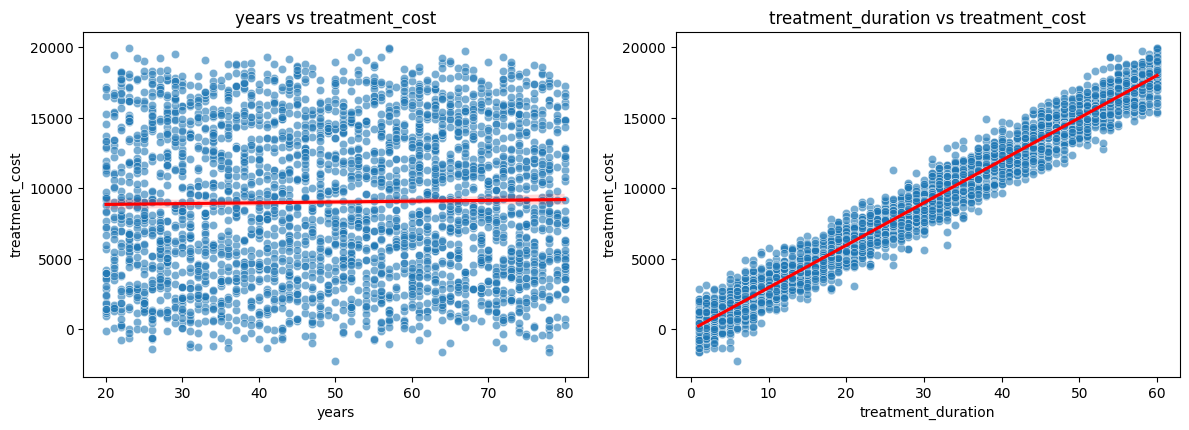

In [ ]:
"""
years no tiene relación clara con treatment_cost, la dispersión es total y la recta es casi horizontal.
En cambio, treatment_duration muestra una relación lineal fuerte con el coste: a más duración, mayor coste.
La tendencia es clara y podría bastar con regresión lineal, aunque conviene revisar outliers y otras características object.
"""
numeric_features = ['years', 'treatment_duration']
target = 'treatment_cost'

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=feature, y=target, alpha=0.6)
    sns.regplot(data=df, x=feature, y=target, scatter=False, color='red')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

## Equilibrio

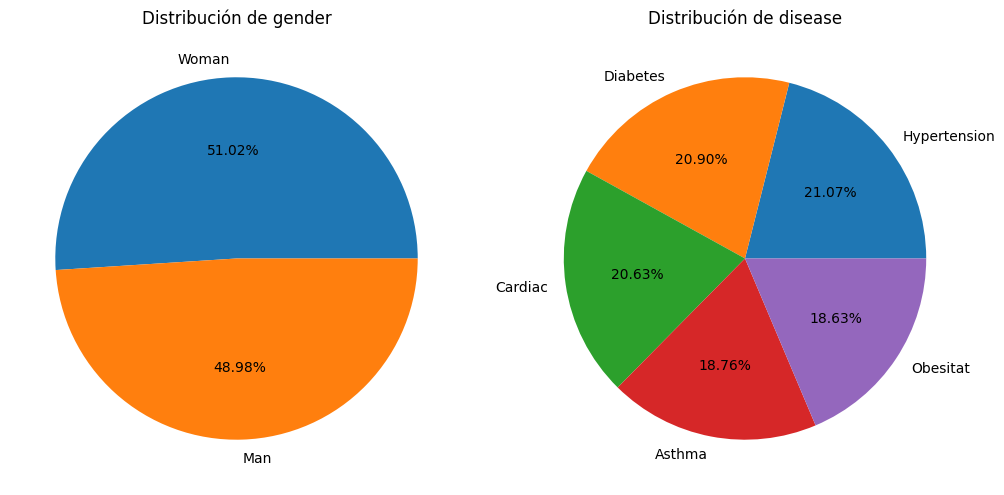

In [ ]:
# Comprobamos si las variables categóricas están equilibradas

import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(cat_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 6 * num_rows))

# Aplanar los ejes para facilitar el recorrido
axes = axes.flatten()

# Generar gráficos de sectores para cada variable categórica
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    labels = counts.index.astype(str)

    axes[i].pie(counts, labels=labels, autopct='%.2f%%')
    axes[i].set_title(f'Distribución de {col}')

# Ocultar ejes vacíos si hay menos categorías que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outliers

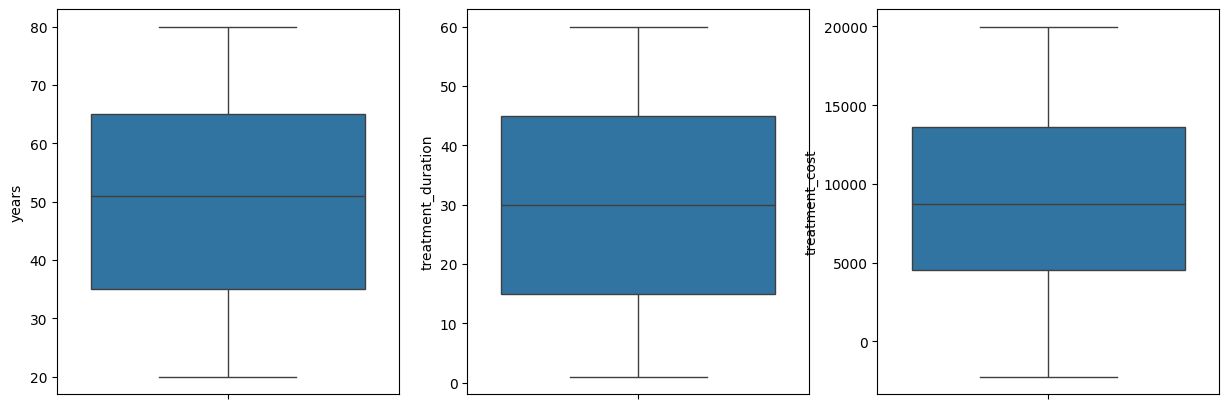

In [ ]:
# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Generar boxplots para cada variable numérica
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Contar el número de outliers por característica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el resultado
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
years                 0
treatment_duration    0
treatment_cost        0
dtype: int64


# Fase 3: División de los datos

In [ ]:
# División previa de los datos del dataframe. X serán las características e y será la columna objetivo
X = df.drop('treatment_cost', axis=1)
y = df['treatment_cost']

In [ ]:
# División de los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encoders y escalado y transformación truncado

In [ ]:
# Codificación one-hot para variables categóricas nominales
X_train = pd.get_dummies(X_train, columns=['gender', 'disease'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['gender', 'disease'], drop_first=True)

# Aseguramos que ambas matrices tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Guardar columnas tras codificación
X_train_columns = X_train.columns

# Escalado (solo para modelos que lo requieren)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Regressión Líneal)

In [ ]:
# Inicialización del regresor
regresor_LR = LinearRegression()

# Entrenamiento del modelo
regresor_LR.fit(X_train, y_train)

# Realización de predicciones
predicciones_LR = regresor_LR.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_LR = r2_score(y_test, predicciones_LR)
mse_LR = mean_squared_error(y_test, predicciones_LR)
rmse_LR = np.sqrt(mse_LR)

print('R^2:', r2_LR)
print('RMSE:', rmse_LR)

R^2: 0.9656896644610727
RMSE: 977.3126735229105


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (SVR)

In [ ]:
# Inicialización del regresor
regresor_SVM = SVR()

# Entrenamiento del modelo
regresor_SVM.fit(X_train, y_train)

# Realización de predicciones
predicciones_SVM = regresor_SVM.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_SVM = r2_score(y_test, predicciones_SVM)
mse_SVM = mean_squared_error(y_test, predicciones_SVM)
rmse_SVM = np.sqrt(mse_SVM)

print('R^2:', r2_SVM)
print('RMSE:', rmse_SVM)

R^2: 0.016026616730984933
RMSE: 5233.746981065596


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (DT)

In [ ]:
# Inicialización del regresor
regresor_DT = DecisionTreeRegressor(random_state=42)

# Entrenamiento del modelo
regresor_DT.fit(X_train, y_train)

# Realización de predicciones
predicciones_DT = regresor_DT.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_DT = r2_score(y_test, predicciones_DT)
mse_DT = mean_squared_error(y_test, predicciones_DT)
rmse_DT = np.sqrt(mse_DT)

print('R^2:', r2_DT)
print('RMSE:', rmse_DT)

R^2: 0.9210351267841939
RMSE: 1482.6478740479247


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RF)

In [ ]:
# Inicializar el modelo de regresión Random Forest
regresor_RF = RandomForestRegressor(random_state=42)

# Entrenamiento del modelo
regresor_RF.fit(X_train, y_train)

# Realización de predicciones
predicciones_RF = regresor_RF.predict(X_test)

# Cálculo de métricas de rendimiento
r2_RF = r2_score(y_test, predicciones_RF)
mse_RF = mean_squared_error(y_test, predicciones_RF)
rmse_RF = np.sqrt(mse_RF)

print('R^2:', r2_RF)
print('RMSE:', rmse_RF)

R^2: 0.9559482559547181
RMSE: 1107.3951103328177


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Adaboost)

In [ ]:
# Inicializar el modelo de regresión AdaBoost
regresor_AB = AdaBoostRegressor(random_state=42)

# Entrenamiento del modelo
regresor_AB.fit(X_train, y_train)

# Realización de predicciones
predicciones_AB = regresor_AB.predict(X_test)

# Cálculo de métricas de rendimiento
r2_AB = r2_score(y_test, predicciones_AB)
mse_AB = mean_squared_error(y_test, predicciones_AB)
rmse_AB = np.sqrt(mse_AB)

print('R^2:', r2_AB)
print('RMSE:', rmse_AB)

R^2: 0.9617039382741247
RMSE: 1032.5191262540236


| Modelo             | R²     | RMSE    |
|--------------------|--------|---------|
| Regresión Lineal   | 0.9657 |  977.31 |
| AdaBoost           | 0.9617 | 1032.52 |
| Random Forest      | 0.9559 | 1107.40 |
| Árbol de Decisión  | 0.9210 | 1482.65 |
| SVM                | 0.0160 | 5233.75 |

En este caso concreto, se recomienda usar Regresión Lineal por su alto ajuste y error bajo, aunque AdaBoost también es una opción sólida.

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Regresión Líneal)

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir la rejilla de valores para alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]
}

# Inicializar el modelo de regresión Ridge
regressor_RL2 = Ridge()

# Configurar búsqueda en rejilla con validación cruzada
grid_search_RL2 = GridSearchCV(
    estimator=regressor_RL2,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

# Ajustar el modelo sobre los datos de entrenamiento
grid_search_RL2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_RL2 = grid_search_RL2.best_estimator_

# Realizar predicciones
predicciones_RL2 = regressor_RL2.predict(X_test)

# Calcular métricas
r2_RL2 = r2_score(y_test, predicciones_RL2)
mse_RL2 = mean_squared_error(y_test, predicciones_RL2)
rmse_RL2 = np.sqrt(mse_RL2)

print('R^2:', r2_RL2)
print('RMSE:', rmse_RL2)

R^2: 0.9656898227342052
RMSE: 977.310419354973


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (SVR)

In [ ]:
# Definir la rejilla de hiperparámetros
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inicializar el modelo SVR
regressor_SVR2 = SVR()

# Búsqueda en rejilla con validación cruzada
grid_search_SVR2 = GridSearchCV(regressor_SVR2, param_grid, cv=5, scoring='r2')
grid_search_SVR2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_SVR2 = grid_search_SVR2.best_estimator_

# Realizar predicciones
predicciones_SVR2 = regressor_SVR2.predict(X_test)

# Calcular métricas
r2_SVR2 = r2_score(y_test, predicciones_SVR2)
mse_SVR2 = mean_squared_error(y_test, predicciones_SVR2)
rmse_SVR2 = np.sqrt(mse_SVR2)

print('R^2:', r2_SVR2)
print('RMSE:', rmse_SVR2)

R^2: 0.9612482082485028
RMSE: 1038.6445384704639


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (DT)

In [ ]:
import warnings

# Desactivar todos los avisos
warnings.filterwarnings("ignore")

# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'mae'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
regressor_DT2 = DecisionTreeRegressor(random_state=42)

# Búsqueda en rejilla con validación cruzada
grid_search_DT2 = GridSearchCV(estimator=regressor_DT2, param_grid=param_grid, cv=5)
grid_search_DT2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_DT2 = grid_search_DT2.best_estimator_
print("Mejores hiperparámetros:", grid_search_DT2.best_params_)

# Predicciones
predicciones_DT2 = regressor_DT2.predict(X_test)

# Métricas
r2_DT2 = r2_score(y_test, predicciones_DT2)
mse_DT2 = mean_squared_error(y_test, predicciones_DT2)
rmse_DT2 = np.sqrt(mse_DT2)

print('R^2:', r2_DT2)
print('RMSE:', rmse_DT2)

Mejores hiperparámetros: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
R^2: 0.9635501560266326
RMSE: 1007.3233121353178


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RF)

In [ ]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],              # Número de árboles en el bosque
    'criterion': ['absolute_error'],         # Método para calcular las divisiones
    'max_depth': [5, 10],                    # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2],                 # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']         # Número máximo de características a considerar
}

# Inicializar el modelo de Random Forest
regressor_RF2 = RandomForestRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_RF2 = GridSearchCV(
    estimator=regressor_RF2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_RF2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_RF2 = grid_search_RF2.best_estimator_
print("Mejores hiperparámetros:", grid_search_RF2.best_params_)

# Predicciones
predicciones_RF2 = regressor_RF2.predict(X_test)

# Métricas de rendimiento
r2_RF2 = r2_score(y_test, predicciones_RF2)
mse_RF2 = mean_squared_error(y_test, predicciones_RF2)
rmse_RF2 = np.sqrt(mse_RF2)

print('R^2:', r2_RF2)
print('RMSE:', rmse_RF2)

Mejores hiperparámetros: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R^2: 0.9530899556513427
RMSE: 1142.7572091624104


#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Adaboost)

In [ ]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],                   # Número de iteraciones (modelos débiles)
    'learning_rate': [0.01, 0.1, 1.0],                # Tasa de aprendizaje
    'estimator': [DecisionTreeRegressor(max_depth=3)]  # Estimador base
}

# Inicializar el modelo de AdaBoost
regressor_AB2 = AdaBoostRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_AB2 = GridSearchCV(
    estimator=regressor_AB2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_AB2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_AB2 = grid_search_AB2.best_estimator_
print("Mejores hiperparámetros:", grid_search_AB2.best_params_)

# Predicciones
predicciones_AB2 = regressor_AB2.predict(X_test)

# Métricas de rendimiento
r2_AB2 = r2_score(y_test, predicciones_AB2)
mse_AB2 = mean_squared_error(y_test, predicciones_AB2)
rmse_AB2 = np.sqrt(mse_AB2)

print('R^2:', r2_AB2)
print('RMSE:', rmse_AB2)

Mejores hiperparámetros: {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 200}
R^2: 0.9629685974816453
RMSE: 1015.3274513661933


# Fase 8: Conclusiones

| Modelo             | R² sin optimizar | RMSE sin optimizar | R² optimizado | RMSE optimizado |
|--------------------|------------------|---------------------|---------------|------------------|
| Regresión Lineal   | 0.9657           |  977.31             | 0.9657        |  977.31          |
| SVR                | 0.0160           | 5233.75             | 0.9612        | 1038.64          |
| Árbol Decisión     | 0.9210           | 1482.65             | 0.9636        | 1007.32          |
| Random Forest      | 0.9559           | 1107.40             | 0.9531        | 1142.76          |
| AdaBoost           | 0.9617           | 1032.52             | 0.9629        | 1015.33          |

Tras la optimización, el Árbol de Decisión mejora notablemente y se sitúa muy cerca del mejor modelo. Sin embargo, la Regresión Lineal sigue siendo el modelo más sólido, con el R² más alto y el RMSE más bajo, incluso sin cambios tras la optimización.
Elegimos Regresión Lineal por su simplicidad, precisión y rendimiento estable.

# Fase 9: Pruebas

## Guardar el modelo

In [ ]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = regresor_LR

# Ruta donde guardar el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'

# Crear el directorio si no existe
os.makedirs(ruta, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/mejor_modelo.pkl


## Cargamos el modelo

In [ ]:
# Importar librerías necesarias
from google.colab import drive
import joblib
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardaste el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Cargar el modelo sin necesidad de volver a entrenarlo
mejor_modelo = joblib.load(ruta_modelo)
print("¡Modelo cargado correctamente!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Modelo cargado correctamente!


## Comprobación del sobreajuste

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='r2')
print(f"Media R² CV: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Media R² CV: 0.9624 - Desviación estándar: 0.0035


In [ ]:
# Predicciones del modelo
train_preds = mejor_modelo.predict(X_train)
test_preds = mejor_modelo.predict(X_test)

# Métricas de rendimiento en entrenamiento y test
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"R² entrenamiento: {train_r2:.4f}")
print(f"R² test: {test_r2:.4f}")
print(f"RMSE entrenamiento: {train_rmse:.4f}")
print(f"RMSE test: {test_rmse:.4f}")

R² entrenamiento: 0.9629
R² test: 0.9657
RMSE entrenamiento: 1028.1736
RMSE test: 977.3127


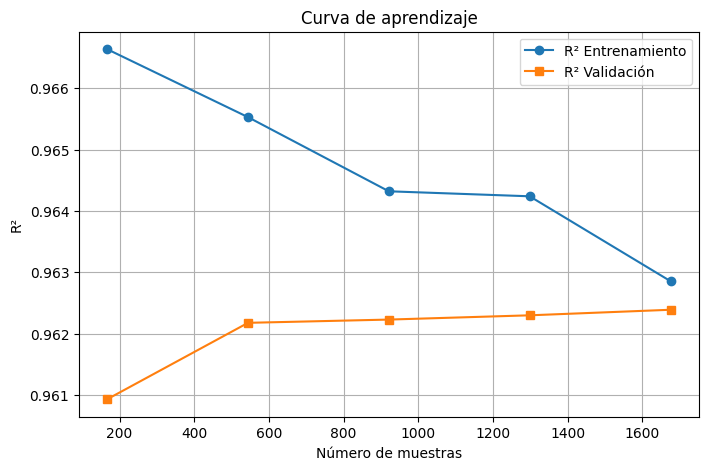

In [ ]:
from sklearn.model_selection import learning_curve

# Obtener las curvas de aprendizaje para regresión
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo, X_train, y_train, cv=5, scoring='r2'
)

# Calcular la media de las puntuaciones en entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='R² Entrenamiento', marker='o')
plt.plot(train_sizes, test_mean, label='R² Validación', marker='s')
plt.xlabel('Número de muestras')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplos curvas de aprendizaje

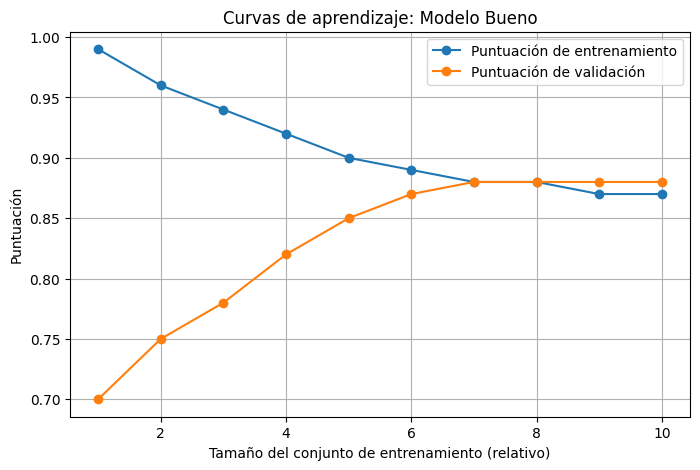

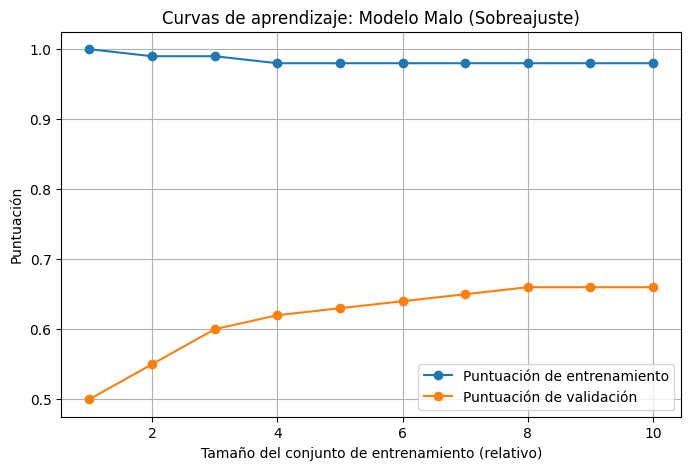

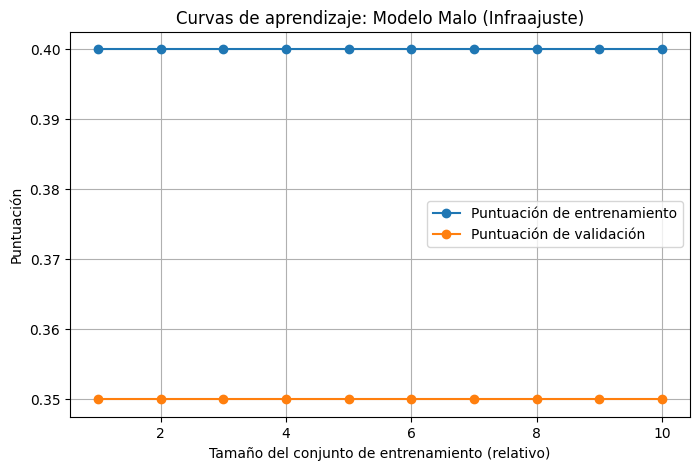

In [ ]:
# Simulación de tamaños del conjunto de entrenamiento (relativos)
train_sizes = np.arange(1, 11)  # 10 puntos

# Modelo bueno: convergencia de las curvas
train_scores_good = np.array([0.99, 0.96, 0.94, 0.92, 0.90, 0.89, 0.88, 0.88, 0.87, 0.87])
val_scores_good   = np.array([0.70, 0.75, 0.78, 0.82, 0.85, 0.87, 0.88, 0.88, 0.88, 0.88])

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_good, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_good, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Bueno")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

# Modelo malo (sobreajuste): puntuación de entrenamiento alta, validación baja
train_scores_bad = np.array([1.0, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])
val_scores_bad   = np.array([0.50, 0.55, 0.60, 0.62, 0.63, 0.64, 0.65, 0.66, 0.66, 0.66])

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_bad, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_bad, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Malo (Sobreajuste)")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

# Definir tamaños relativos del conjunto de entrenamiento
train_sizes = np.arange(1, 11)  # 10 puntos

# Ejemplo de infraajuste: ambas curvas bajas y casi constantes
train_scores_under = np.array([0.40] * 10)
val_scores_under   = np.array([0.35] * 10)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_under, marker='o', label='Puntuación de entrenamiento')
plt.plot(train_sizes, val_scores_under, marker='o', label='Puntuación de validación')
plt.title("Curvas de aprendizaje: Modelo Malo (Infraajuste)")
plt.xlabel("Tamaño del conjunto de entrenamiento (relativo)")
plt.ylabel("Puntuación")
plt.legend()
plt.grid(True)
plt.show()

## Más pruebas

In [ ]:
# Hacer predicciones con el mejor modelo
predicciones = mejor_modelo.predict(X_test)

# Mostrar los 25 primeros tiempos reales, predicciones, diferencias y porcentaje de error
for i in range(25):
    real = y_test.values[i]
    pred = predicciones[i]

    diferencia = real - pred
    error_porcentual = abs(diferencia / real) * 100  # Cálculo del error porcentual

    print(f"{i+1}: Coste real: {real:.2f} - Coste predicho: {pred:.2f} - "
          f"Diferencia: {diferencia:.2f} - Error: {error_porcentual:.2f}%")

1: Coste real: 17251.69 - Coste predicho: 17628.64 - Diferencia: -376.95 - Error: 2.18%
2: Coste real: 14596.73 - Coste predicho: 13761.44 - Diferencia: 835.29 - Error: 5.72%
3: Coste real: 7707.79 - Coste predicho: 7781.04 - Diferencia: -73.25 - Error: 0.95%
4: Coste real: 11918.79 - Coste predicho: 11967.60 - Diferencia: -48.82 - Error: 0.41%
5: Coste real: 3450.74 - Coste predicho: 2048.69 - Diferencia: 1402.05 - Error: 40.63%
6: Coste real: 297.40 - Coste predicho: 1448.57 - Diferencia: -1151.17 - Error: 387.07%
7: Coste real: 12300.45 - Coste predicho: 12327.44 - Diferencia: -26.98 - Error: 0.22%
8: Coste real: 5535.11 - Coste predicho: 5066.99 - Diferencia: 468.12 - Error: 8.46%
9: Coste real: 6012.00 - Coste predicho: 5677.27 - Diferencia: 334.73 - Error: 5.57%
10: Coste real: 4769.91 - Coste predicho: 5888.26 - Diferencia: -1118.35 - Error: 23.45%
11: Coste real: 14816.20 - Coste predicho: 15943.20 - Diferencia: -1127.00 - Error: 7.61%
12: Coste real: 8272.93 - Coste predicho: 

### Criterios para valorar el error porcentual en regresión

| Nivel        | Rango de error      | Interpretación                                                                 |
|--------------|---------------------|---------------------------------------------------------------------------------|
| ✔️ Bueno     | Menos del 10%        | Predicción muy ajustada. El modelo funciona de forma óptima.                   |
| ➖ Aceptable | Entre 10% y 30%      | El modelo capta la tendencia, aunque con cierta imprecisión.                   |
| ❌ Malo      | Más del 30%          | Error elevado. El modelo no generaliza bien o hay casos atípicos o ruido.      |

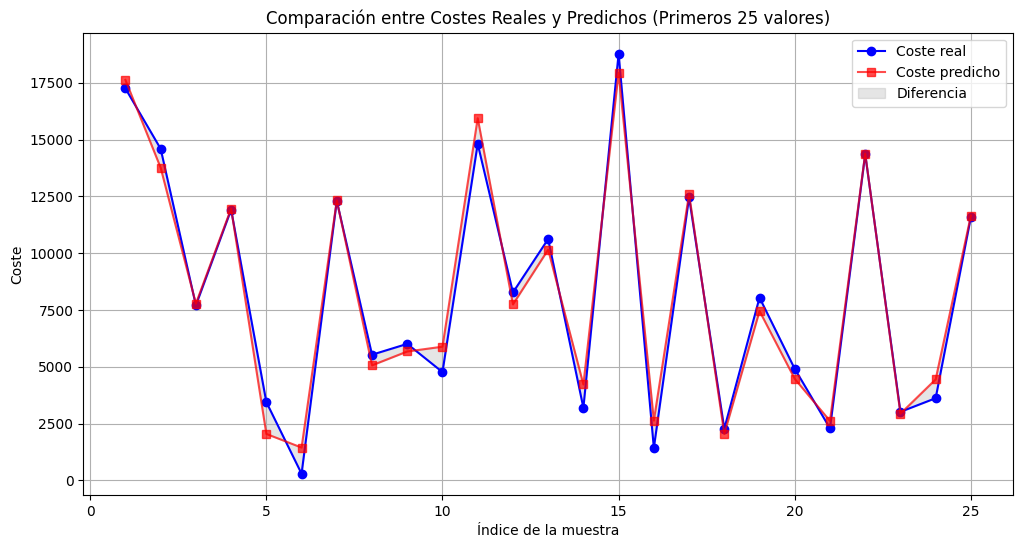

In [ ]:
# Tomamos los primeros 25 valores
reales_25 = y_test.values[:25]
predichos_25 = predicciones[:25]
indices = list(range(1, 26))

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(indices, reales_25, marker='o', linestyle='-', label='Coste real', color='blue')
plt.plot(indices, predichos_25, marker='s', linestyle='-', label='Coste predicho', color='red', alpha=0.7)
plt.fill_between(indices, reales_25, predichos_25, color='gray', alpha=0.2, label='Diferencia')

# Configuración del gráfico
plt.xlabel("Índice de la muestra")
plt.ylabel("Coste")
plt.title("Comparación entre Costes Reales y Predichos (Primeros 25 valores)")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

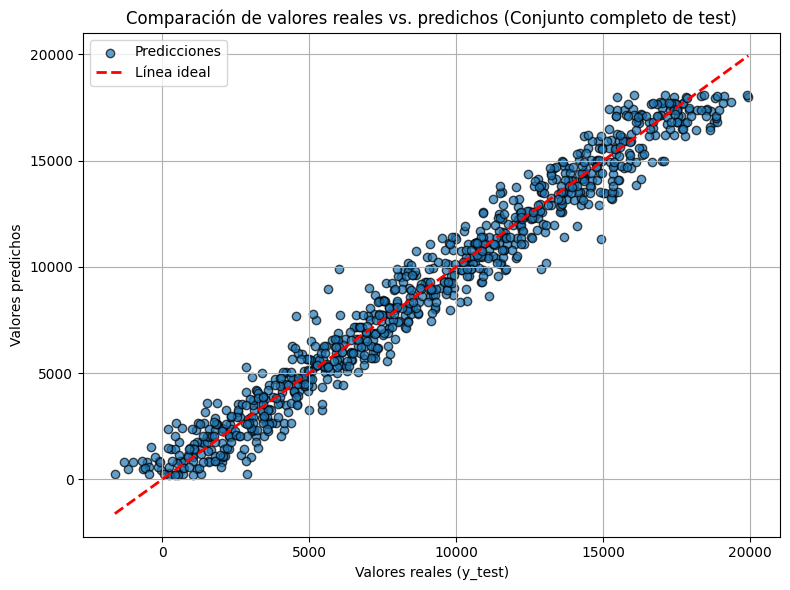

In [ ]:
"""
El modelo generaliza bien y ofrece predicciones consistentes, lo que refuerza la decisión de utilizarlo como modelo final.
"""
# Crear el gráfico de dispersión para todo el conjunto de test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, alpha=0.7, edgecolors='k', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea ideal")

# Configuración del gráfico
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Valores predichos')
plt.title('Comparación de valores reales vs. predichos (Conjunto completo de test)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

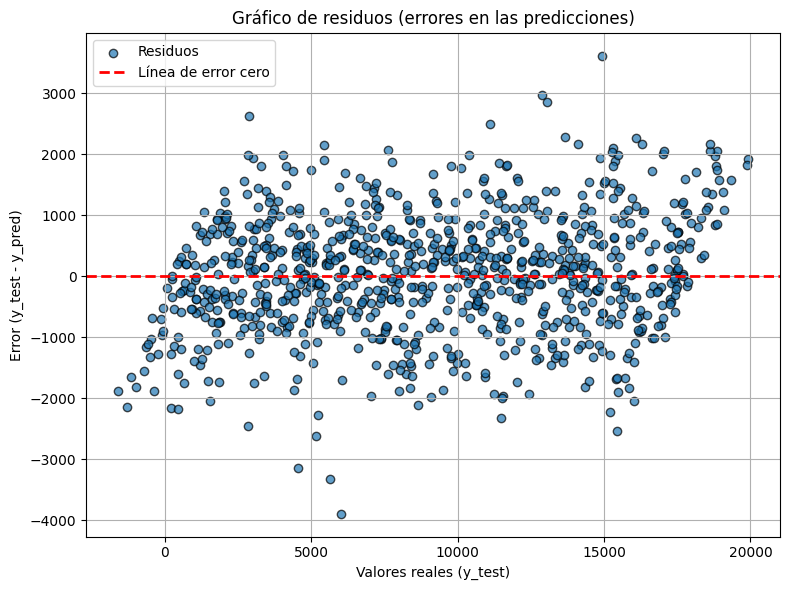

In [ ]:
"""
El modelo generaliza bien y los errores están controlados.
No se aprecian patrones preocupantes,
Dispersión moderada: aunque hay cierta variabilidad, los errores suelen estar entre -2000 y +2000, lo cual es razonable dado el rango de valores.
Aunque una revisión más fina podría valorar aplicar técnicas robustas o modelos con ajuste local si se quiere pulir aún más.
"""
# Calcular los errores (residuos)
residuos = y_test - predicciones  # Diferencia entre valores reales y predicciones

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuos, alpha=0.7, edgecolors='k', label="Residuos")
plt.axhline(y=0, color='r', linestyle='--', lw=2, label="Línea de error cero")

# Configuración del gráfico
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Error (y_test - y_pred)')
plt.title('Gráfico de residuos (errores en las predicciones)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Nuevas predicciones con RL

In [ ]:
# Dataset: 12178.50456723342

# Crear nueva observación
nueva_observacion = pd.DataFrame([{
    'years': 28,
    'gender': 'Woman',
    'disease': 'Asthma',
    'treatment_duration': 39
}])

# Aplicar codificación one-hot igual que en el entrenamiento
nueva_observacion = pd.get_dummies(nueva_observacion, columns=['gender', 'disease'], drop_first=True)

# Alinear columnas con el conjunto de entrenamiento
nueva_observacion = nueva_observacion.reindex(columns=X_train_columns, fill_value=0)

# Aplicar el mismo escalado que se usó en el entrenamiento
nueva_observacion_escalada = scaler.transform(nueva_observacion)

# Realizar la predicción con el modelo entrenado
prediccion = mejor_modelo.predict(nueva_observacion_escalada)
print(f'Coste estimado del tratamiento: {prediccion[0]:.2f} €')

Coste estimado del tratamiento: 11595.49 €


In [ ]:
# Dataset: 2016.3312417414622
# Crear nueva observación
nueva_observacion = pd.DataFrame([{
    'years': 42,
    'gender': 'Man',
    'disease': 'Diabetes',
    'treatment_duration': 7
}])

# Aplicar codificación one-hot igual que en el entrenamiento
nueva_observacion = pd.get_dummies(nueva_observacion, columns=['gender', 'disease'], drop_first=True)

# Alinear columnas con el conjunto de entrenamiento
nueva_observacion = nueva_observacion.reindex(columns=X_train_columns, fill_value=0)

# Aplicar el mismo escalado que se usó en el entrenamiento
nueva_observacion_escalada = scaler.transform(nueva_observacion)

# Realizar la predicción con el modelo entrenado
prediccion = mejor_modelo.predict(nueva_observacion_escalada)
print(f'Coste estimado del tratamiento: {prediccion[0]:.2f} €')

Coste estimado del tratamiento: 1965.76 €
